In [1]:
# Importing packages nedded

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
#Load Data and see basic data properties.

data = pd.read_csv('../data/togo-dapaong_qc.csv')
print(data.head())
data.shape

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


(525600, 19)

Summary Statistics: Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand data distribution.

In [3]:
# Displaying Statistics Summary. As required in Task discription 

data.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

Data Quality Check: Look for missing values, outliers, or incorrect entries (e.g., negative values where only positive should exist), especially in columns like GHI, DNI, and DHI and check for outliers, especially in sensor readings (ModA, ModB) and wind speed data (WS, WSgust).

In [4]:
# Displaying  missing values. 
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Displaying outliers using z-score and threshold 2 as it's general convention that z-scores above 2 is outliner.
# Out liners from WS, WSgust, TModA, TModB
# Using scipy.stats form stats

columns_to_check_for_outliners = ['WS', 'WSgust', 'TModA', 'TModB']
z_scores = data[columns_to_check_for_outliners].apply(zscore)

threshold = 2
outliers = (z_scores.abs() > threshold)
data['Outlier'] = outliers.any(axis=1)

outlier_data = data[data['Outlier']]
print(outlier_data, outlier_data.shape)

               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
673     2021-10-25 11:14   897.0  478.5  486.3   940.0   928.0  31.2  68.2   
674     2021-10-25 11:15  1094.0  706.7  490.8  1140.0  1126.0  31.2  67.9   
675     2021-10-25 11:16  1085.0  696.1  491.6  1133.0  1118.0  31.2  66.5   
676     2021-10-25 11:17   949.0  527.9  489.1   987.0   974.0  31.2  67.0   
677     2021-10-25 11:18   829.0  384.4  492.8   863.0   851.0  31.2  67.7   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
524993  2022-10-24 13:54   777.2  746.6  163.0   813.1   782.2  35.0  29.4   
524994  2022-10-24 13:55   779.8  750.5  163.4   814.2   783.7  34.9  29.4   
525005  2022-10-24 14:06   750.4  773.1  138.8   784.7   754.5  35.0  28.9   
525012  2022-10-24 14:13   731.6  737.5  157.8   764.4   734.9  35.1  28.4   
525017  2022-10-24 14:18   717.6  735.5  154.9   749.9   720.7  35.1  29.7   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Pr

In [6]:
# Displaying Incorrect values from GHI, DNI, DHI

columns_to_check_for_incorrect_values = ['GHI', 'DNI', 'DHI']

negative_values = data[(data[columns_to_check_for_incorrect_values] < 0).any(axis=1)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  C

Time Series Analysis: Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

In [7]:
# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

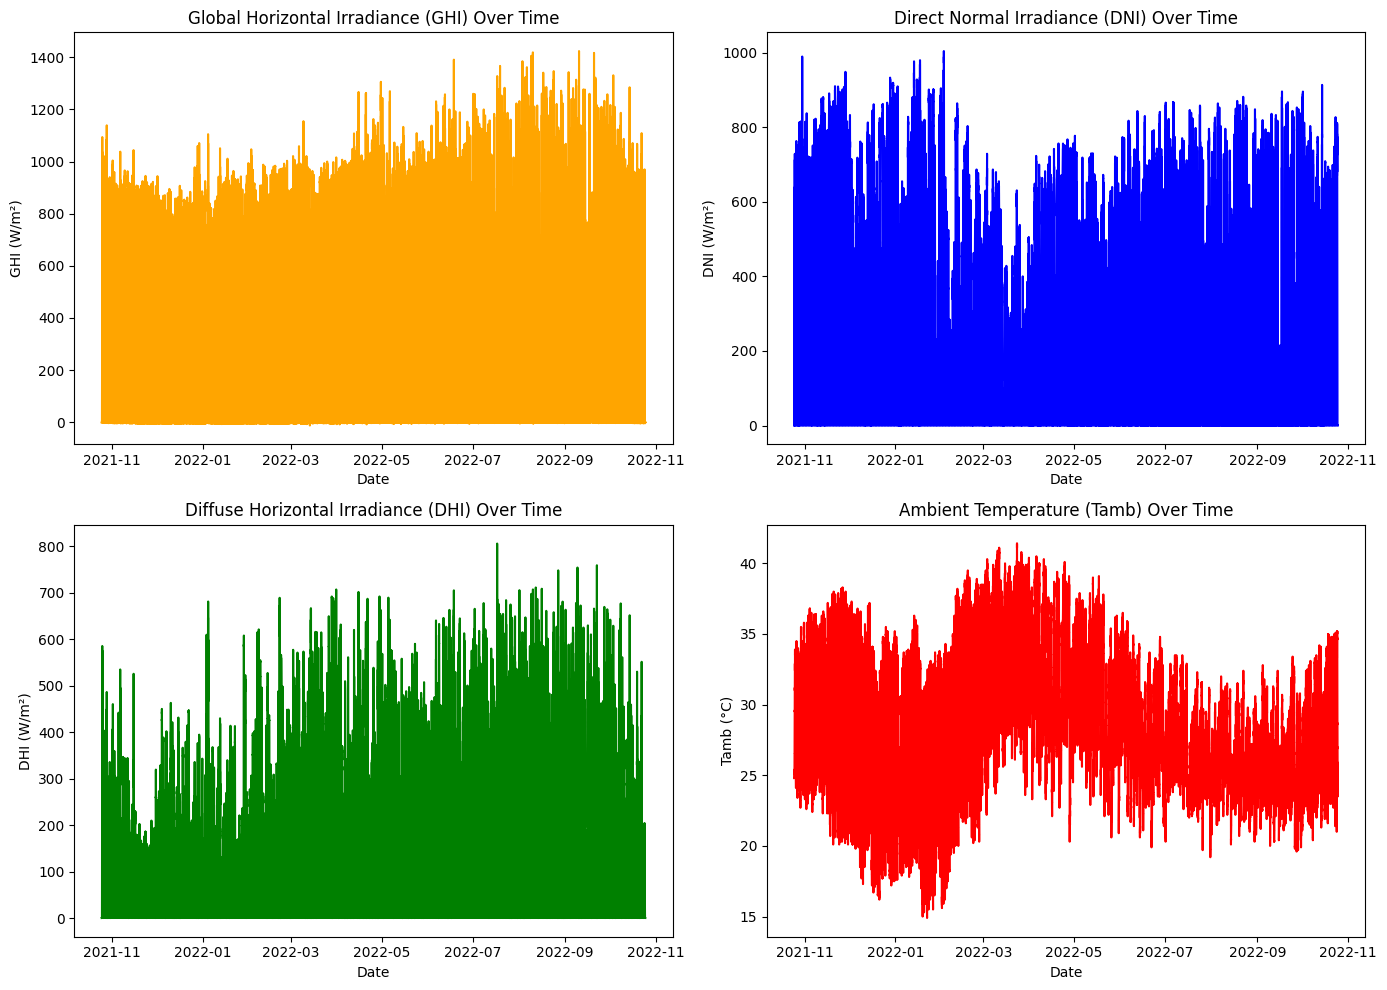

In [8]:
# Daily Plots for GHI, DNI, DHI, and Tamb

daily_data = data.resample('D').mean()
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(data.index, data['GHI'], color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(data.index, data['DNI'], color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(data.index, data['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Tamb'], color='red')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Date')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()



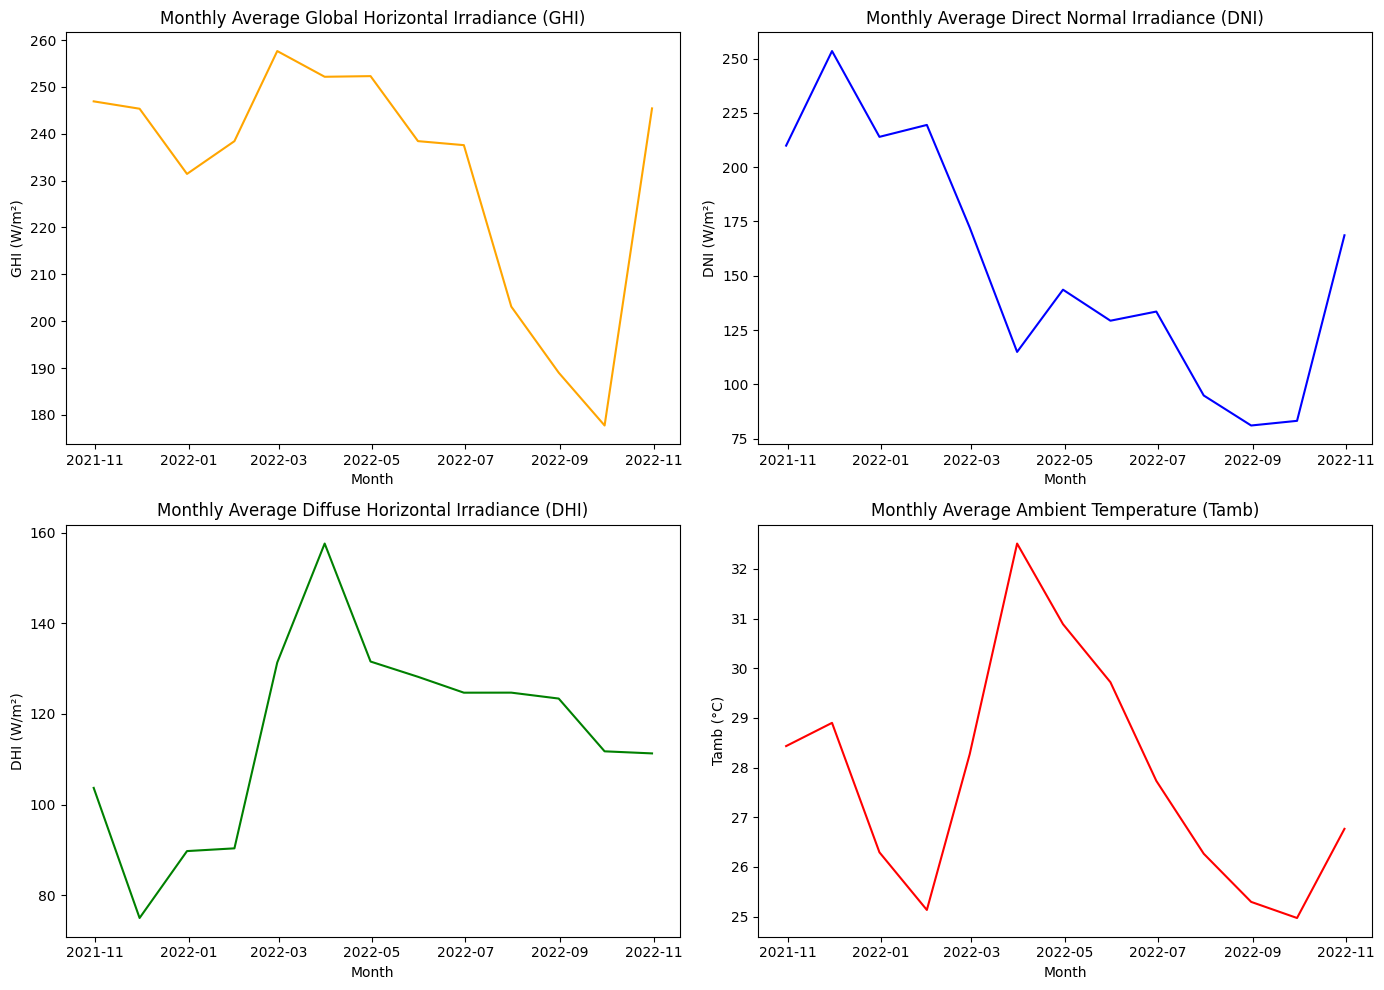

In [9]:
# Resample data to monthly means
monthly_data = data.resample('ME').mean()
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(monthly_data.index, monthly_data['GHI'], color='orange')
plt.title('Monthly Average Global Horizontal Irradiance (GHI)')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(monthly_data.index, monthly_data['DNI'], color='blue')
plt.title('Monthly Average Direct Normal Irradiance (DNI)')
plt.xlabel('Month')
plt.ylabel('DNI (W/m²)')

# Plot DHI 
plt.subplot(2, 2, 3)
plt.plot(monthly_data.index, monthly_data['DHI'], color='green')
plt.title('Monthly Average Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Month')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(monthly_data.index, monthly_data['Tamb'], color='red')
plt.title('Monthly Average Ambient Temperature (Tamb)')
plt.xlabel('Month')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

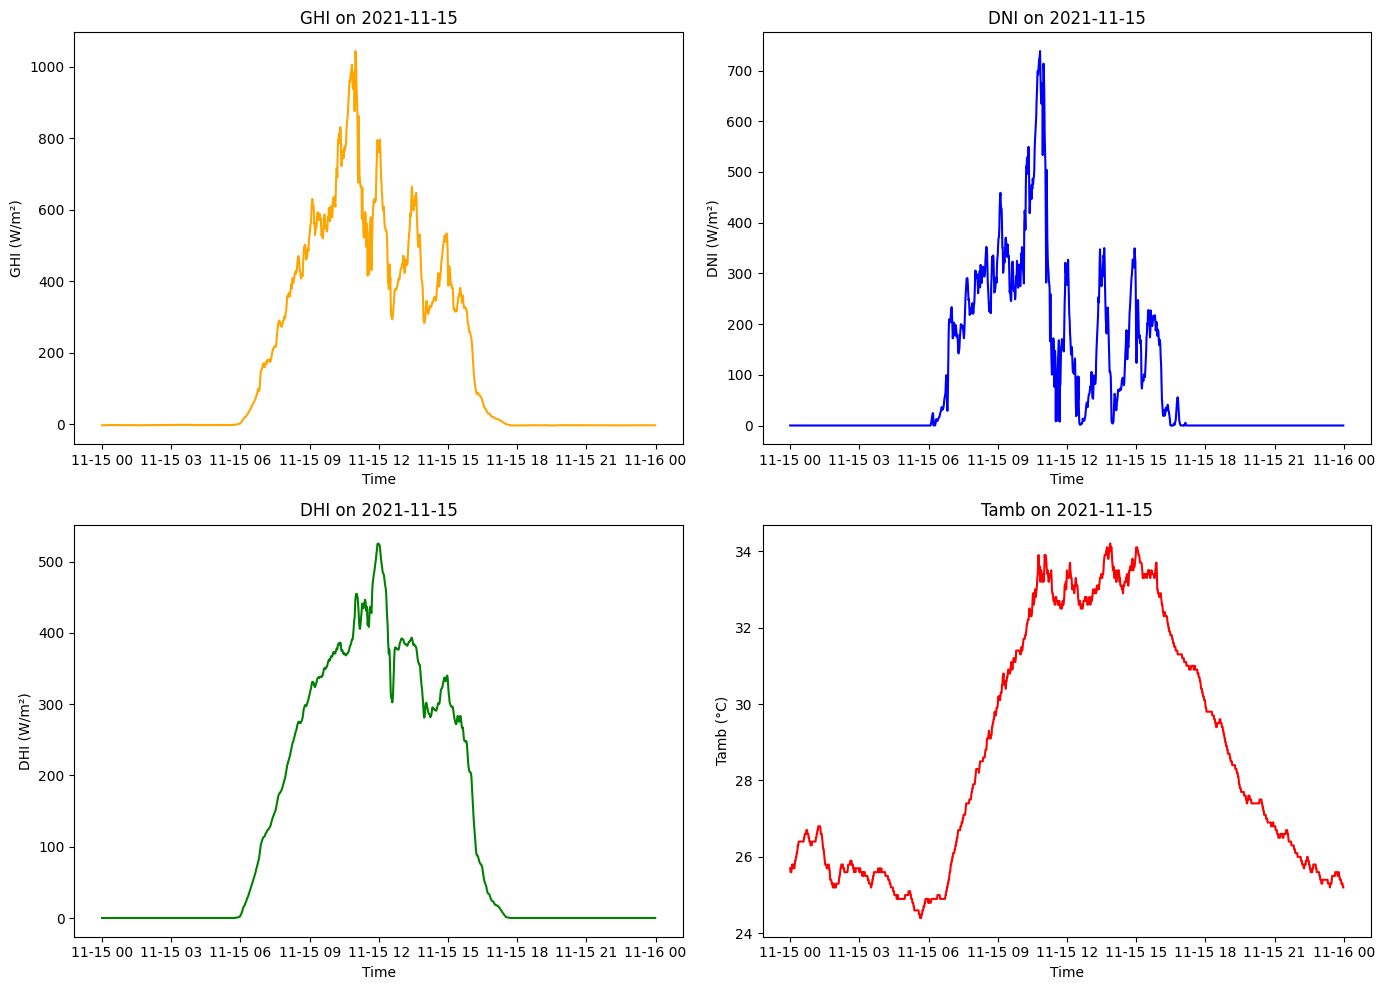

In [10]:
# Example: Zoom in on a specific day or range of days
specific_day = '2021-11-15'
data_specific_day = data.loc[specific_day]

plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(data_specific_day.index, data_specific_day['GHI'], color='orange')
plt.title(f'GHI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(data_specific_day.index, data_specific_day['DNI'], color='blue')
plt.title(f'DNI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(data_specific_day.index, data_specific_day['DHI'], color='green')
plt.title(f'DHI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(data_specific_day.index, data_specific_day['Tamb'], color='red')
plt.title(f'Tamb on {specific_day}')
plt.xlabel('Time')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

 Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

C:\Users\BisreG\AppData\Local\Temp\ipykernel_1256\2475344695.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


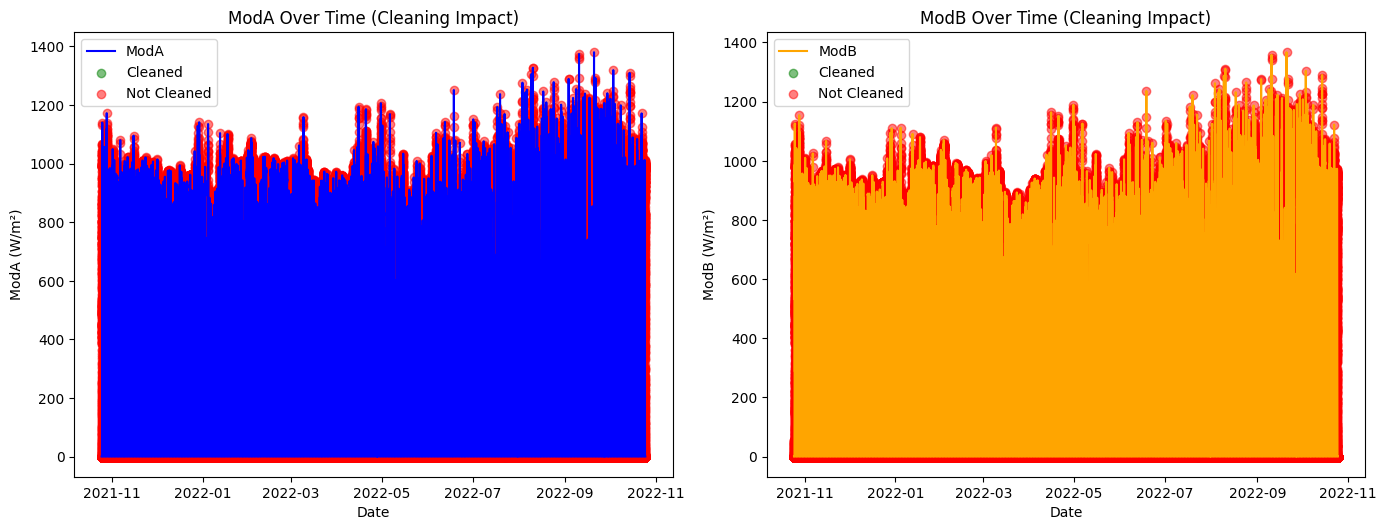

In [11]:
plt.figure(figsize=(14, 10))

# Plot ModA with respect to Cleaning
plt.subplot(2, 2, 1)
plt.plot(data.index, data['ModA'], color='blue', label='ModA')
plt.scatter(data.index[data['Cleaning'] == 1], data['ModA'][data['Cleaning'] == 1], color='green', label='Cleaned', alpha=0.5)
plt.scatter(data.index[data['Cleaning'] == 0], data['ModA'][data['Cleaning'] == 0], color='red', label='Not Cleaned', alpha=0.5)
plt.title('ModA Over Time (Cleaning Impact)')
plt.xlabel('Date')
plt.ylabel('ModA (W/m²)')
plt.legend()

# Plot ModB with respect to Cleaning
plt.subplot(2, 2, 2)
plt.plot(data.index, data['ModB'], color='orange', label='ModB')
plt.scatter(data.index[data['Cleaning'] == 1], data['ModB'][data['Cleaning'] == 1], color='green', label='Cleaned', alpha=0.5)
plt.scatter(data.index[data['Cleaning'] == 0], data['ModB'][data['Cleaning'] == 0], color='red', label='Not Cleaned', alpha=0.5)
plt.title('ModB Over Time (Cleaning Impact)')
plt.xlabel('Date')
plt.ylabel('ModB (W/m²)')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Calculate statistics before and after cleaning
cleaned_stats = data[data['Cleaning'] == 1][['ModA', 'ModB']].describe()
not_cleaned_stats = data[data['Cleaning'] == 0][['ModA', 'ModB']].describe()

print("Cleaned Data Statistics:")
print(cleaned_stats)

print("\nNot Cleaned Data Statistics:")
print(not_cleaned_stats)


Cleaned Data Statistics:
              ModA         ModB
count   281.000000   281.000000
mean    535.186477   532.211744
std     237.849443   233.107743
min       0.000000     0.000000
25%     373.700000   376.100000
50%     521.200000   532.100000
75%     704.900000   699.600000
max    1086.000000  1068.000000

Not Cleaned Data Statistics:
                ModA           ModB
count  525319.000000  525319.000000
mean      225.979064     219.401351
std       317.303768     307.882893
min         0.000000       0.000000
25%         0.000000       0.000000
50%         4.300000       4.200000
75%       422.000000     410.400000
max      1380.000000    1367.000000


Correlation Analysis: Use heatmaps or pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB). Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.

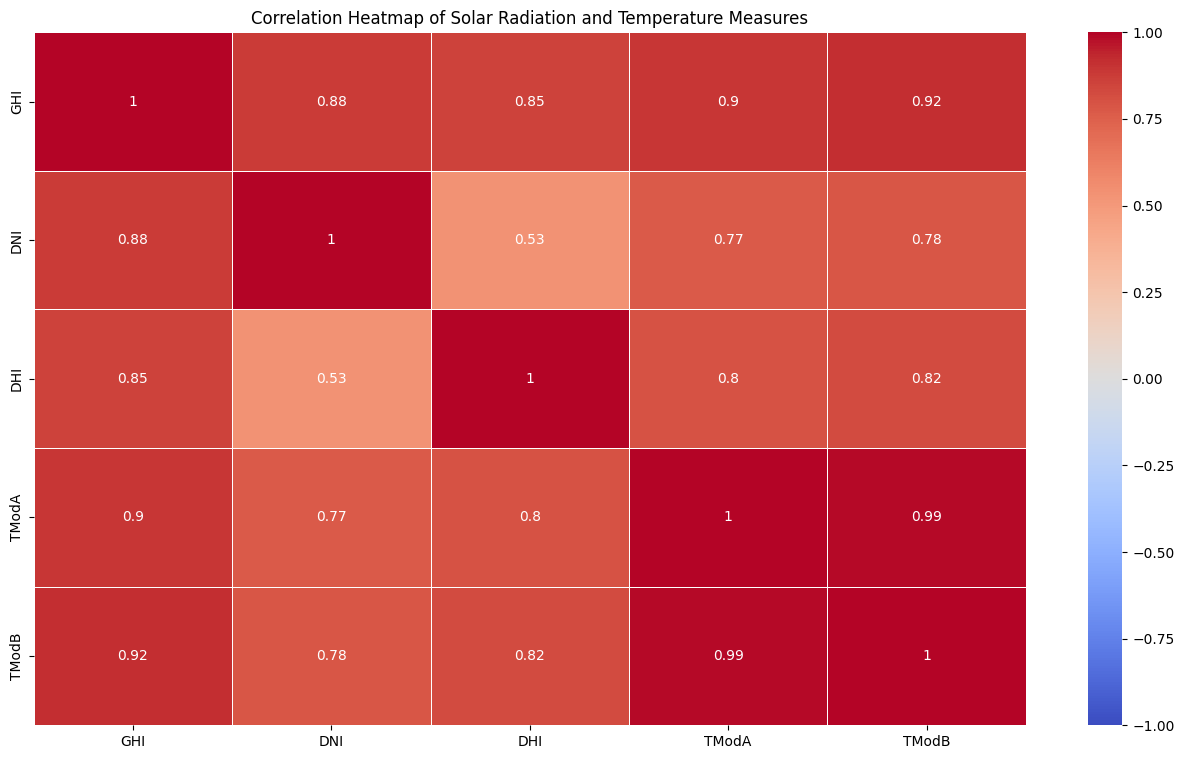

In [13]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = data[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation and Temperature Measures')
plt.show()

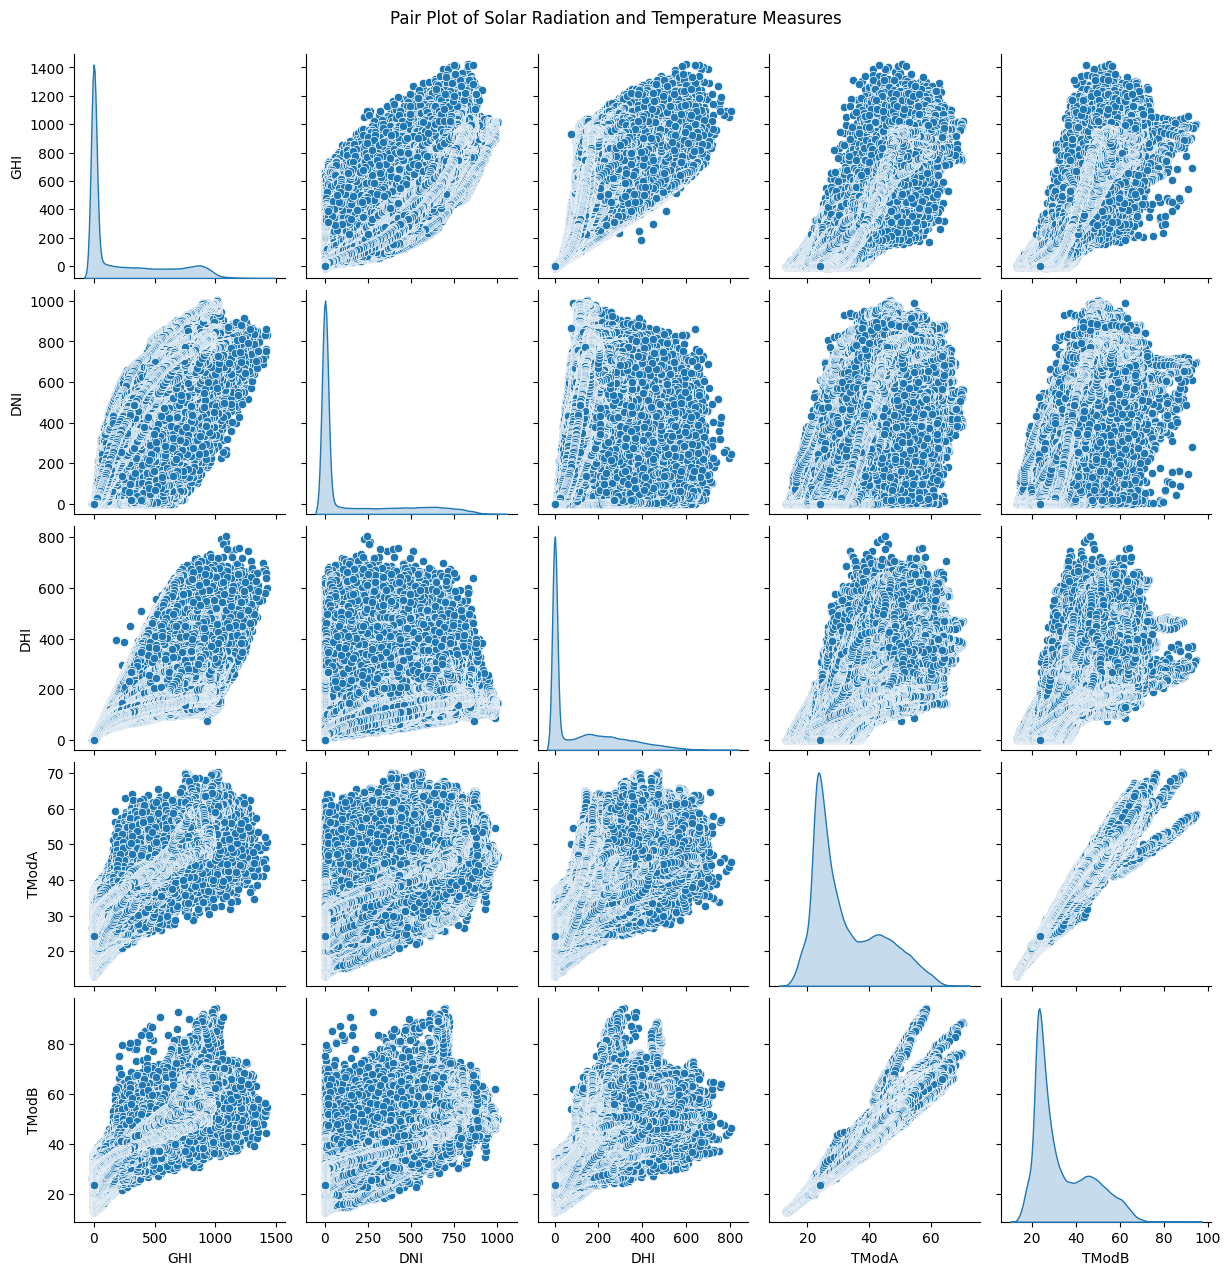

In [14]:
# Create a pair plot for selected variables
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], diag_kind='kde')
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

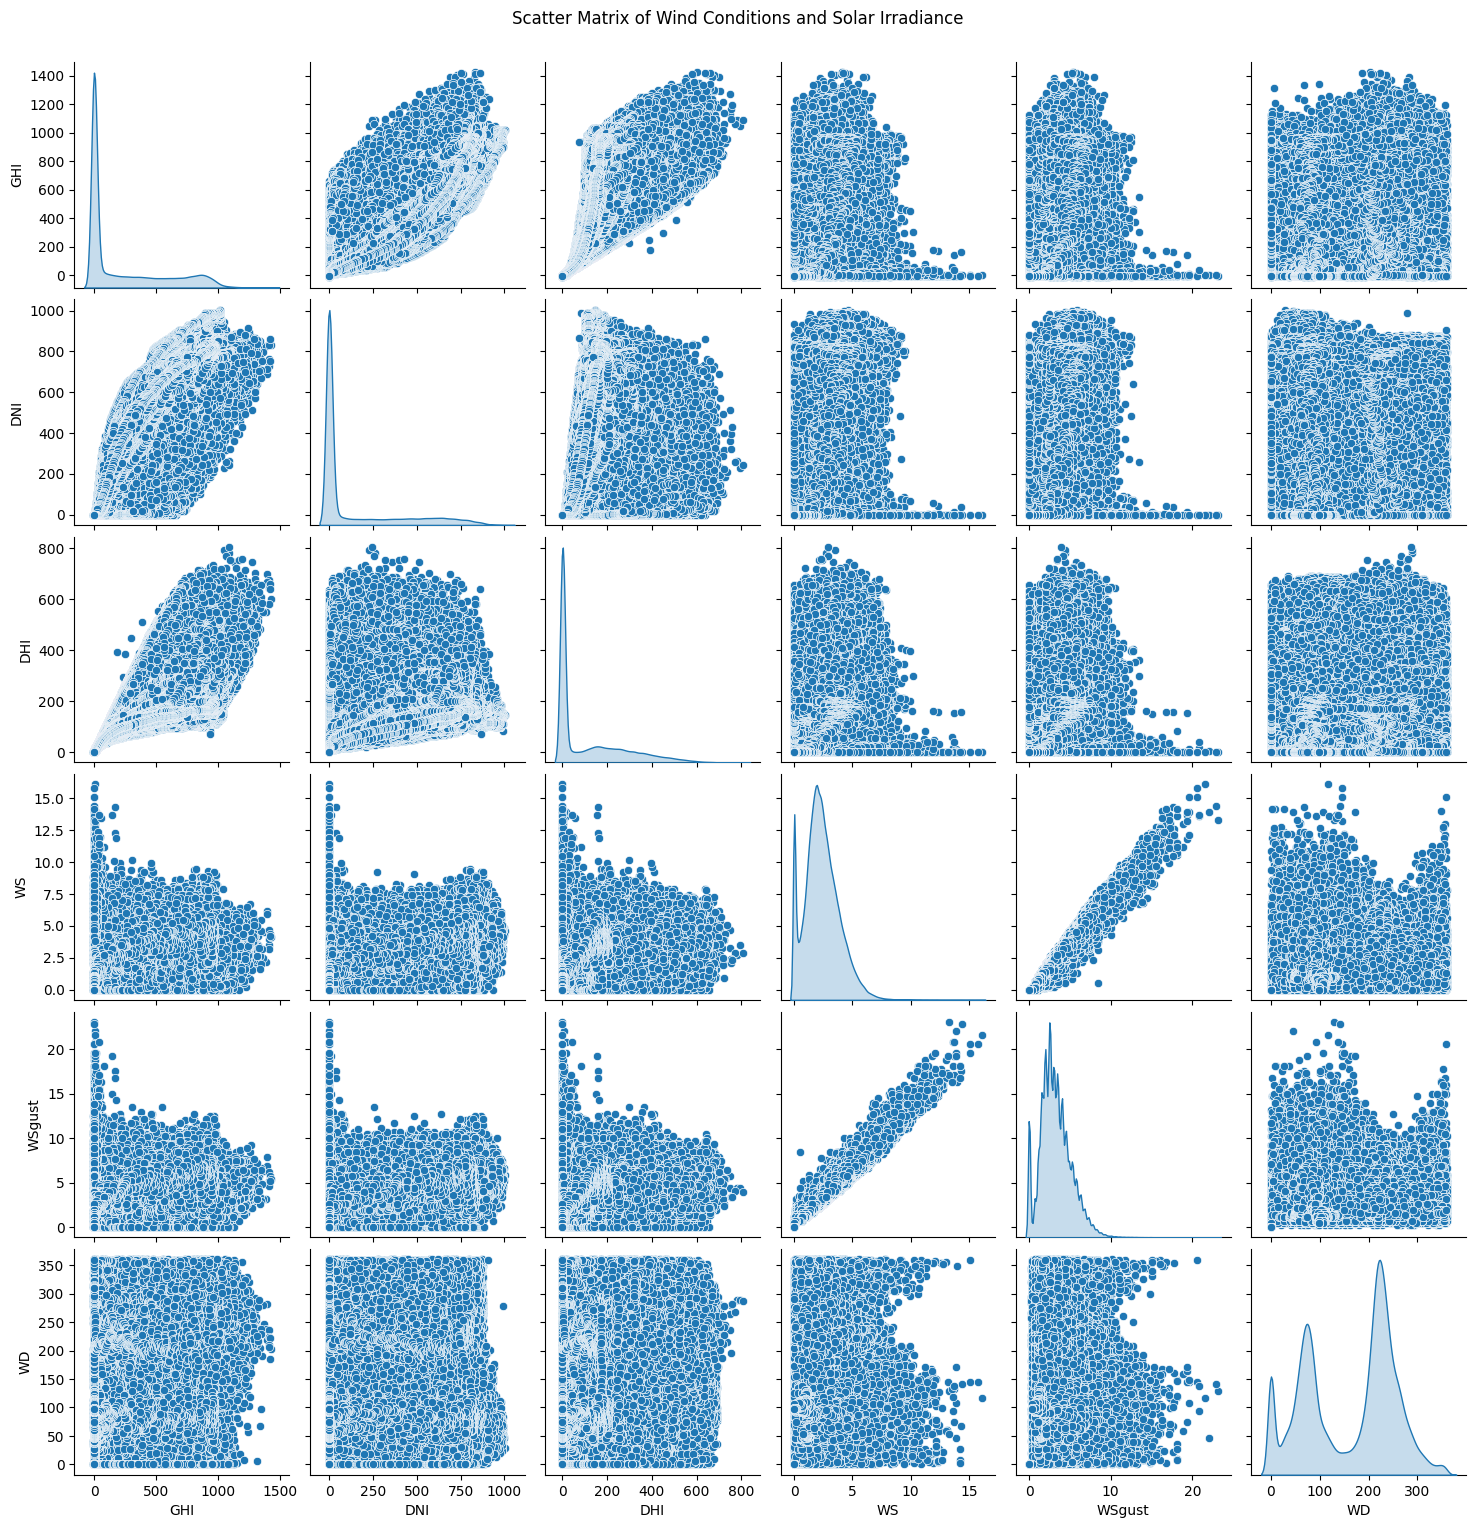

In [15]:
# Create a scatter matrix for wind conditions and solar irradiance
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']], diag_kind='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

Wind Analysis: Use Polar plots Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be.

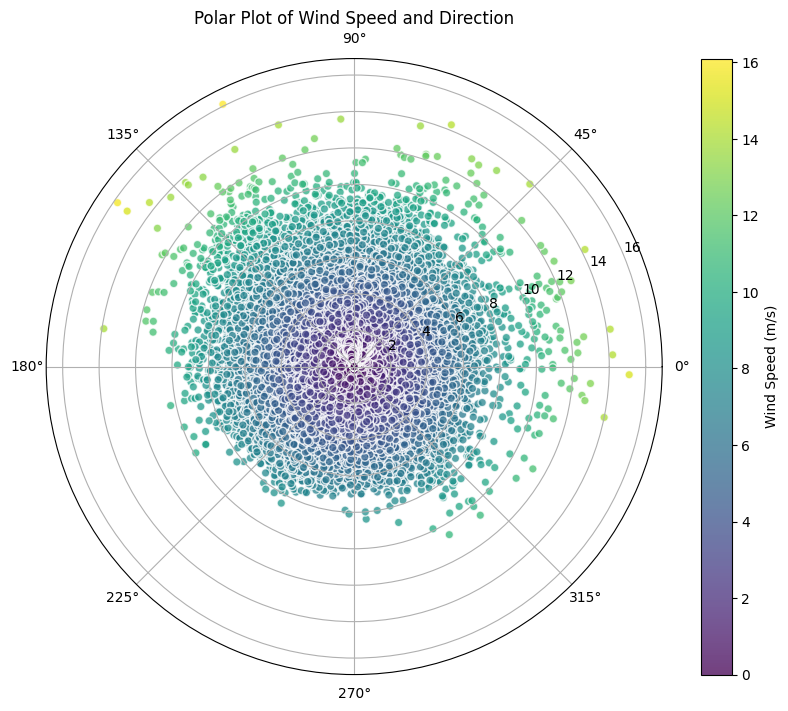

In [16]:
data['WD_rad'] = np.deg2rad(data['WD'])

# Prepare data for plotting
wind_speeds = data['WS'].dropna()
wind_directions = data['WD_rad'].dropna()

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Scatter plot of wind direction and speed
sc = ax.scatter(wind_directions, wind_speeds, c=wind_speeds, cmap='viridis', alpha=0.75, edgecolors='w')
plt.colorbar(sc, label='Wind Speed (m/s)')
ax.set_title('Polar Plot of Wind Speed and Direction')
plt.show()

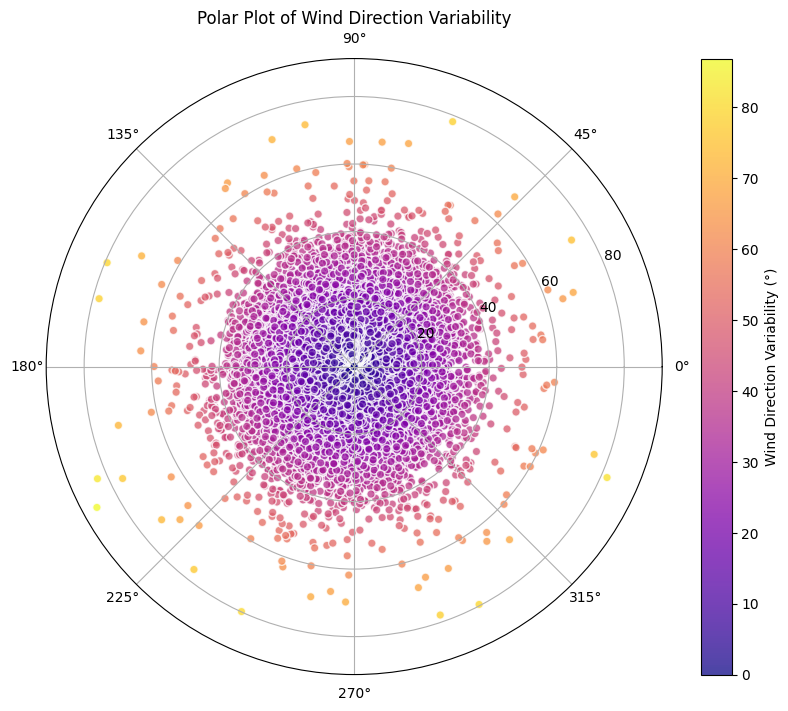

In [17]:
# Prepare data for variability plotting
wind_direction_std = data['WDstdev'].dropna()

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Scatter plot of wind direction and variability
sc = ax.scatter(wind_directions, wind_direction_std, c=wind_direction_std, cmap='plasma', alpha=0.75, edgecolors='w')
plt.colorbar(sc, label='Wind Direction Variability (°)')
ax.set_title('Polar Plot of Wind Direction Variability')
plt.show()

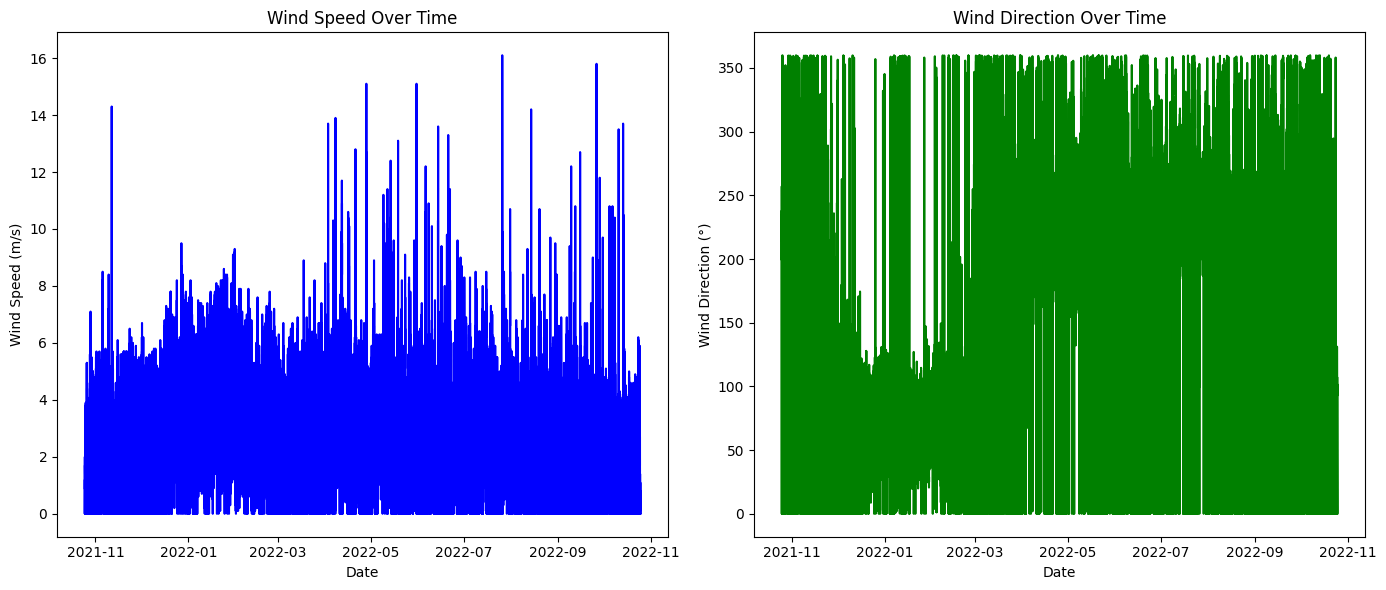

In [18]:
# Create time-series plots
plt.figure(figsize=(14, 6))

# Plot wind speed over time
plt.subplot(1, 2, 1)
plt.plot(data.index, data['WS'], label='Wind Speed (m/s)', color='blue')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')

# Plot wind direction over time
plt.subplot(1, 2, 2)
plt.plot(data.index, data['WD'], label='Wind Direction (°)', color='green')
plt.title('Wind Direction Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Direction (°)')

plt.tight_layout()
plt.show()


Temperature Analysis: Examine how relative humidity (RH) might influence temperature readings and solar radiation.

In [19]:
# Calculate correlations to quantify the strength of relationships.
corr_rh_temp = data[['RH', 'Tamb']].corr().loc['RH', 'Tamb']
corr_rh_ghi = data[['RH', 'GHI']].corr().loc['RH', 'GHI']
corr_rh_dni = data[['RH', 'DNI']].corr().loc['RH', 'DNI']
corr_rh_dhi = data[['RH', 'DHI']].corr().loc['RH', 'DHI']

print(f"Correlation between RH and Temperature: {corr_rh_temp:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")
print(f"Correlation between RH and DNI: {corr_rh_dni:.2f}")
print(f"Correlation between RH and DHI: {corr_rh_dhi:.2f}")

Correlation between RH and Temperature: -0.40
Correlation between RH and GHI: -0.26
Correlation between RH and DNI: -0.33
Correlation between RH and DHI: -0.16


Histograms: Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables.

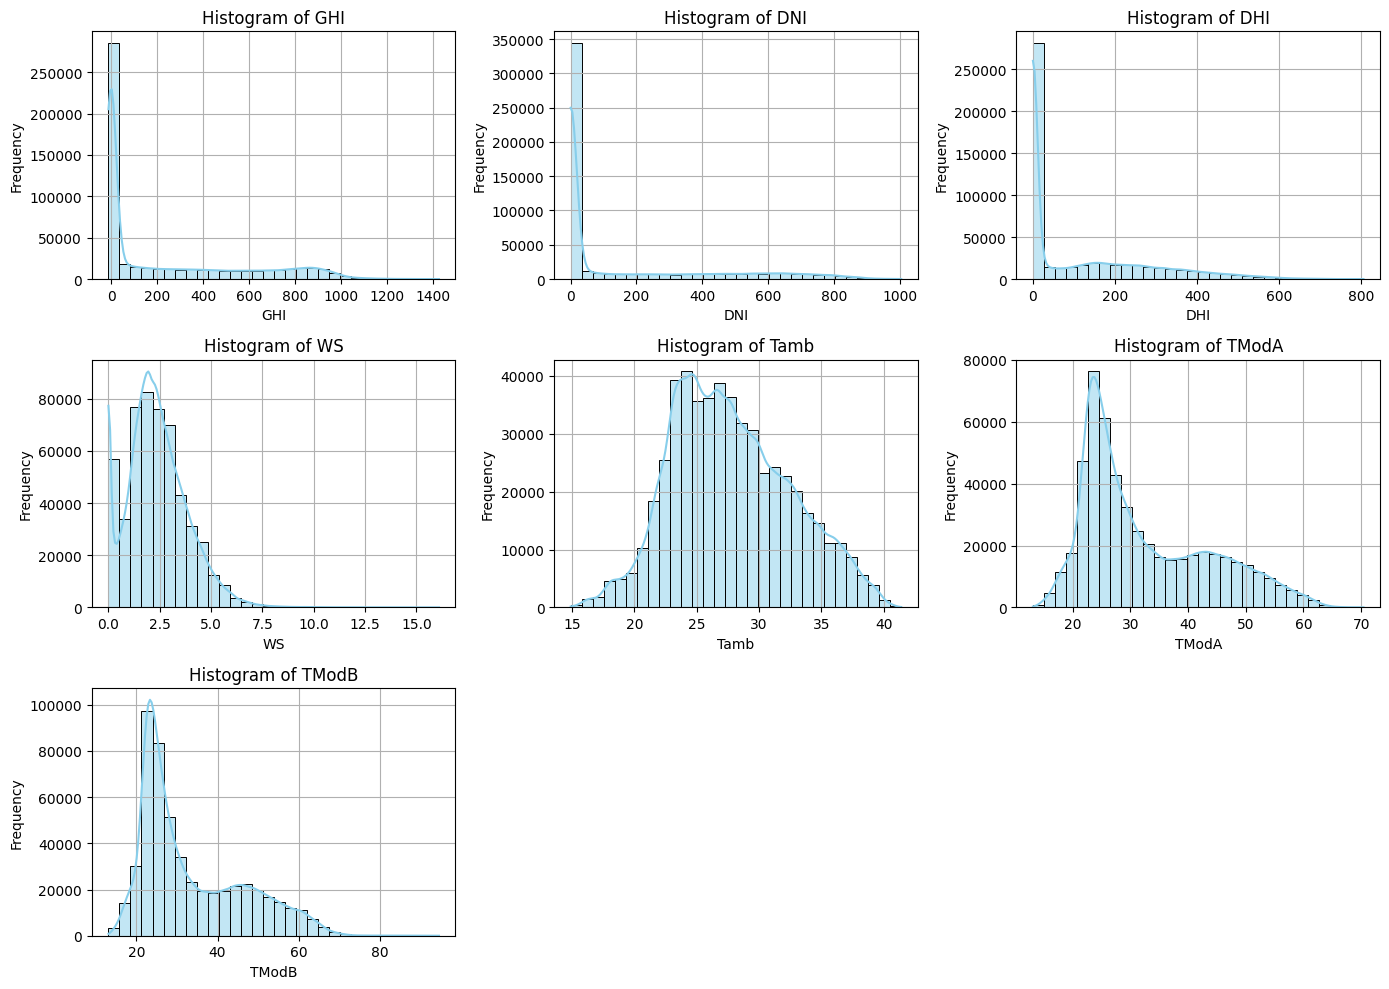

In [20]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

# Create histograms for each variable
plt.figure(figsize=(14, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)  # Create a subplot for each variable
    sns.histplot(data[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

Z-Score Analysis: Calculate Z-scores to flag data points that are significantly different from the mean

In [21]:
columns_to_check_for_outliners = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

z_scores = data[columns_to_check_for_outliners].apply(zscore)

threshold = 2
outliers = (z_scores.abs() > threshold)
data['Outlier'] = outliers.any(axis=1)

outlier_data = data[data['Outlier']]
print(outlier_data, outlier_data.shape)


                       GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-10-25 08:41:00  445.0   39.5  433.3  443.9  439.2  28.1  79.5  2.2   
2021-10-25 08:42:00  455.8   52.5  435.8  455.5  450.7  28.2  79.8  2.6   
2021-10-25 08:43:00  451.3   40.6  437.7  448.9  444.1  28.3  78.9  3.2   
2021-10-25 08:44:00  445.6   28.4  440.1  443.1  438.4  28.3  78.3  2.8   
2021-10-25 08:45:00  449.3   29.8  442.5  446.5  441.8  28.3  78.5  3.4   
...                    ...    ...    ...    ...    ...   ...   ...  ...   
2022-10-24 15:01:00  566.2  663.4  141.0  590.3  565.9  34.7  31.8  3.6   
2022-10-24 15:02:00  559.5  657.7  139.6  582.9  558.9  34.7  30.8  3.4   
2022-10-24 15:03:00  559.5  661.5  139.9  583.2  559.1  34.6  32.5  2.2   
2022-10-24 15:04:00  556.9  662.3  139.5  580.7  556.7  34.7  32.9  2.6   
2022-10-24 15:05:00  552.0  656.9  139.8  575.3  551.5  34.8  30.8  3.1   

                     WSg

#Bubble charts to explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)

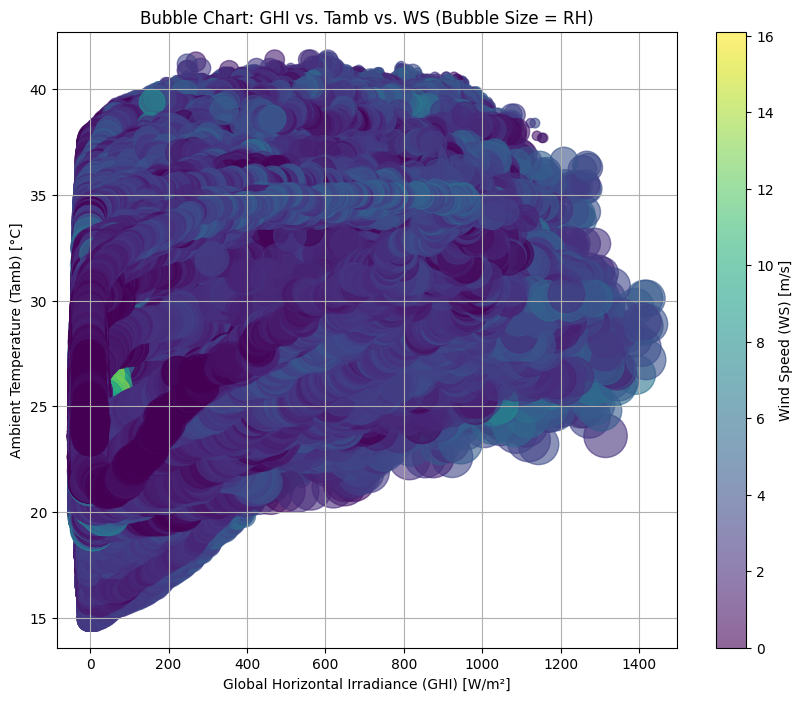

In [22]:
plt.figure(figsize=(10, 8))

# Scatter plot with bubble size representing RH
plt.scatter(data['GHI'], data['Tamb'], s=data['RH']*10, c=data['WS'], alpha=0.6, cmap='viridis')

# Adding labels and title
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size = RH)')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')

# Adding colorbar for WS
cbar = plt.colorbar()
cbar.set_label('Wind Speed (WS) [m/s]')

# Show the plot
plt.grid(True)
plt.show()

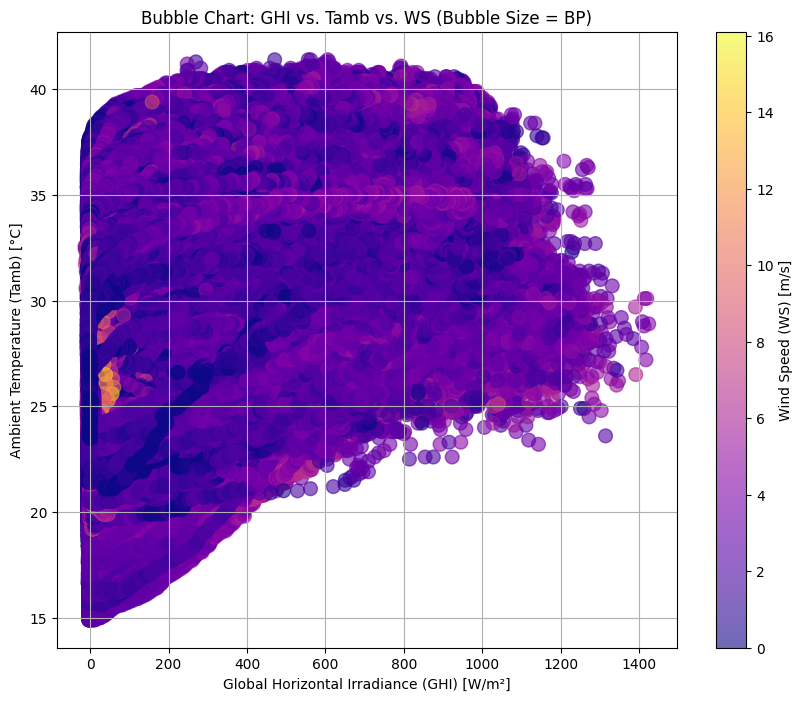

In [23]:
plt.figure(figsize=(10, 8))

plt.scatter(data['GHI'], data['Tamb'], s=data['BP']*0.1, c=data['WS'], alpha=0.6, cmap='plasma')

plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size = BP)')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')

cbar = plt.colorbar()
cbar.set_label('Wind Speed (WS) [m/s]')

plt.grid(True)
plt.show()

Data Cleaning: Based on the initial analysis, clean the dataset by handling anomalies and missing values, especially in columns like Comments which appear entirely null.

In [24]:
# Drop columns with all null values
data = data.dropna(axis=1, how='all')

# Fill missing values in specific columns with mean or median
data['GHI'].fillna(data['GHI'].mean())
data['DNI'].fillna(data['DNI'].mean())
data['DHI'].fillna(data['DHI'].mean())

# Drop rows with missing values in critical columns
data.dropna(subset=['Tamb', 'WS'], inplace=True)

In [25]:
z_scores = np.abs(zscore(data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']].dropna()))
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]


In [26]:
# Replace negative values with NaN in columns that should be non-negative
data.loc[data['GHI'] < 0, 'GHI'] = np.nan
data.loc[data['DNI'] < 0, 'DNI'] = np.nan
data.loc[data['DHI'] < 0, 'DHI'] = np.nan
data.loc[data['WS'] < 0, 'WS'] = np.nan

# Refill missing values after correcting negatives
data['GHI'].fillna(data['GHI'].mean())
data['DNI'].fillna(data['DNI'].mean())
data['DHI'].fillna(data['DHI'].mean())
data['WS'].fillna(data['WS'].mean())


Timestamp
2021-10-25 00:01:00    0.9
2021-10-25 00:02:00    1.1
2021-10-25 00:03:00    1.2
2021-10-25 00:04:00    1.2
2021-10-25 00:05:00    1.3
                      ... 
2022-10-24 23:56:00    0.0
2022-10-24 23:57:00    0.0
2022-10-24 23:58:00    0.0
2022-10-24 23:59:00    0.0
2022-10-25 00:00:00    0.0
Name: WS, Length: 516754, dtype: float64

In [27]:
data.describe()

GHI            DNI            DHI           ModA  \
count  260570.000000  516754.000000  516754.000000  516754.000000   
mean      445.364405     147.788111     112.595761     219.146467   
std       315.812919     247.687019     151.458398     311.824771   
min         0.000000       0.000000       0.000000       0.000000   
25%       151.800000       0.000000       0.000000       0.000000   
50%       417.300000       0.000000       1.500000       2.800000   
75%       729.000000     236.700000     210.900000     403.200000   
max      1198.000000     904.100000     586.000000    1209.200000   

                ModB           Tamb             RH             WS  \
count  516754.000000  516754.000000  516754.000000  516754.000000   
mean      212.786544      27.717839      55.179501       2.319165   
std       302.578938       4.753393      28.720891       1.387716   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.100000      26.800000       1.400000   
50%         2.700000      27.200000      59.400000       2.200000   
75%       392.100000      31.000000      81.000000       3.200000   
max      1192.000000      41.400000      99.800000       6.700000   

              WSgust        WSstdev             WD        WDstdev  \
count  516754.000000  516754.000000  516754.000000  516754.000000   
mean        3.165240       0.549785     161.963203      10.494874   
std         1.781782       0.256560      91.990779       5.910168   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.700000       6.800000   
50%         2.900000       0.500000     199.900000      10.700000   
75%         4.200000       0.700000     233.600000      14.000000   
max        13.500000       3.200000     360.000000      83.000000   

                  BP       Cleaning  Precipitation          TModA  \
count  516754.000000  516754.000000  516754.000000  516754.000000   
mean      975.897042       0.000526       0.001001      32.280165   
std         2.149637       0.022937       0.019212      10.917593   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.800000   
50%       976.000000       0.000000       0.000000      28.200000   
75%       977.000000       0.000000       0.000000      40.300000   
max       983.000000       1.000000       1.800000      65.400000   

               TModB         WD_rad  
count  516754.000000  516754.000000  
mean       33.325782       2.826791  
std        12.621496       1.605542  
min        13.100000       0.000000  
25%        23.600000       1.303761  
50%        28.200000       3.488913  
75%        42.500000       4.077089  
max        71.800000       6.283185

In [28]:
data.to_csv('../data/cleaned_togo-dapaong_qc_data.csv', index=False)